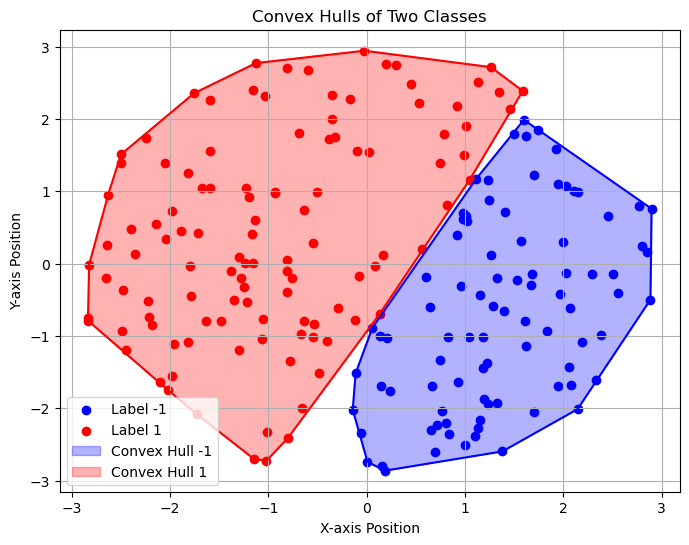

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Load the CSV file
# Replace 'your_file.csv' with the actual file path
file_path = 'input.csv'
data = pd.read_csv(file_path)

# Extract columns
x = data.iloc[:, 0]  # X-axis positions
y = data.iloc[:, 1]  # Y-axis positions
labels = data.iloc[:, 2]  # Labels (-1 or 1)

# Separate the two classes
class_minus_one = data[labels == -1]
class_one = data[labels == 1]

# Function to plot the convex hull
def plot_convex_hull(points, color, label):
    if len(points) < 3:
        return  # Convex hull requires at least 3 points
    hull = ConvexHull(points)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], color=color)
    plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], color=color, alpha=0.3, label=label)

# Plot points
plt.figure(figsize=(8, 6))
plt.scatter(class_minus_one.iloc[:, 0], class_minus_one.iloc[:, 1], color='blue', label='Label -1')
plt.scatter(class_one.iloc[:, 0], class_one.iloc[:, 1], color='red', label='Label 1')

# Plot convex hulls
plot_convex_hull(class_minus_one.iloc[:, [0, 1]].values, 'blue', 'Convex Hull -1')
plot_convex_hull(class_one.iloc[:, [0, 1]].values, 'red', 'Convex Hull 1')

# Add labels, legend, and grid
plt.xlabel('X-axis Position')
plt.ylabel('Y-axis Position')
plt.title('Convex Hulls of Two Classes')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
